# Proyek Analisis Data: Bike Sharing
- Nama: Deo Fibrianico
- Email: nico98deo@gmail.com
- Id Dicoding: deonico

## Menentukan Pertanyaan Bisnis

1. Bagaimana kinerja bike sharing pada tiap bulan?
2. Bagaimana kinerja bike sharing berdasarkan hari dan tipe konsumen?
3. Bagaimana kinerja bike sharing berdasarkan cuaca?
4. Bagaimana kinerja bike sharing pada tiap musim?

## Menyiapkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data

In [2]:
# Membaca Data day.csv
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Membaca Data hour.csv
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Dataset characteristics:

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Assessing Data

#### Table : day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


(✗) Pada kolom dteday di tabel day_df menggunakan tipe data berupa objek, seharusnya berupa tipe data datetime.

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

(✓) Pada tabel day_df tidak ada nilai yang hilang atau kosong.

In [6]:
print("Count Duplicated: ", day_df.duplicated().sum())

Count Duplicated:  0


(✓) Pada tabel day_df tidak ada nilai yang duplicate.

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Table : hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


(✗) Pada kolom dteday di tabel hour_df menggunakan tipe data berupa objek, seharusnya berupa tipe data datetime.

In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

(✓) Pada tabel hour_df tidak ada nilai yang hilang atau kosong.

In [10]:
print("Count Duplicated: ", hour_df.duplicated().sum())

Count Duplicated:  0


(✓) Pada tabel hour_df tidak ada nilai yang duplicate.

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Kesimpulan:

**Table Data**|**Missing Value**|**Duplicated Data**|**Inaccurate Value**
:-----:|:-----:|:-----:|:-----:
day\_df|Terdapat kesalahan tipe data untuk kolom dteday|Tidak Ada|Tidak Ada|Tidak Ada
hour\_df|Terdapat kesalahan tipe data untuk kolom dteday|Tidak Ada|Tidak Ada|Tidak Ada

Berikutnya, relabeling untuk mengubah pada sejumlah kolom yang akan dianalisis, bertujuan untuk memudahkan dalam membaca data. Selanjutnya, kolom "holiday" akan dihapus, mengingat informasi "holiday" telah tersedia dalam kolom "workingday."

### Cleaning Data

##### Set Label

In [12]:
# Memberikan label untuk istilah/singkatan yang susah dipahami
column_day_mapping = {
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_situation',
    'atemp': 'feeling_temperature',
    'hum': 'humidity',
    'cnt': 'count'
}
column_hour_mapping = {
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather_situation',
    'atemp': 'feeling_temperature',
    'hum': 'humidity',
    'cnt': 'count'
}
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
year_labels = {0: '2011', 1: '2012'}
workingday_labels = {0: 'Holiday', 1: 'Working Day'}
weather_situation_labels = {1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'}
month_labels = {1: 'January', 2: 'February', 3: 'March',
                4:'April',5:'May',6:'June',7:'July',
                8:'August',9:'September',10:'October',11:'November',12:'December'}
weekday_labels = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',
                  3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

#### **Table : day_df**

##### Mengubah nama kolom

In [13]:
day_df.rename(columns=column_day_mapping, inplace=True)

##### Menghapus kolom yang tidak digunakan

In [14]:
day_df.drop(['holiday','instant'], axis=1, inplace=True, errors='ignore')

##### Mengubah tipe data dteday menjadi datetime

In [15]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dteday               731 non-null    datetime64[ns]
 1   season               731 non-null    int64         
 2   year                 731 non-null    int64         
 3   month                731 non-null    int64         
 4   weekday              731 non-null    int64         
 5   workingday           731 non-null    int64         
 6   weather_situation    731 non-null    int64         
 7   temp                 731 non-null    float64       
 8   feeling_temperature  731 non-null    float64       
 9   humidity             731 non-null    float64       
 10  windspeed            731 non-null    float64       
 11  casual               731 non-null    int64         
 12  registered           731 non-null    int64         
 13  count                731 non-null  

##### Mengubah nilai di kolom yang ditentukan

In [17]:
# Definisi pemetaan label
column_labels = {
    'season': season_labels,
    'year': year_labels,
    'workingday': workingday_labels,
    'weather_situation': weather_situation_labels,
    'month': month_labels,
    'weekday': weekday_labels
}

for column, label_mapping in column_labels.items():
    day_df[column] = day_df[column].apply(lambda x: label_mapping[x] if x in label_mapping else x)

day_df.sample(5)

,dteday,season,year,month,weekday,workingday,weather_situation,temp,feeling_temperature,humidity,windspeed,casual,registered,count
2,2011-01-03,Spring,2011,January,Tuesday,Working Day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
418,2012-02-23,Spring,2012,February,Friday,Working Day,Clear,0.454167,0.444446,0.554583,0.190913,516,4546,5062
102,2011-04-13,Summer,2011,April,Thursday,Working Day,Mist,0.412500,0.417283,0.819167,0.250617,209,1953,2162
455,2012-03-31,Summer,2012,March,Sunday,Holiday,Mist,0.424167,0.421708,0.738333,0.250617,2301,3934,6235
246,2011-09-04,Fall,2011,September,Monday,Holiday,Clear,0.709167,0.665429,0.742083,0.206467,2521,2419,4940


#### **Table : hour_df**

##### Mengubah nama kolom

In [18]:
hour_df.rename(columns=column_hour_mapping, inplace=True)

##### Menghapus kolom yang tidak digunakan

In [19]:
hour_df.drop(['holiday','instant'], axis=1, inplace=True, errors='ignore')

##### Mengubah tipe data dteday menjadi datetime

In [20]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [21]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dteday               17379 non-null  datetime64[ns]
 1   season               17379 non-null  int64         
 2   year                 17379 non-null  int64         
 3   month                17379 non-null  int64         
 4   hour                 17379 non-null  int64         
 5   weekday              17379 non-null  int64         
 6   workingday           17379 non-null  int64         
 7   weather_situation    17379 non-null  int64         
 8   temp                 17379 non-null  float64       
 9   feeling_temperature  17379 non-null  float64       
 10  humidity             17379 non-null  float64       
 11  windspeed            17379 non-null  float64       
 12  casual               17379 non-null  int64         
 13  registered           17379 non-

##### Mengubah nilai di kolom yang ditentukan

In [22]:
# Definisi pemetaan label
column_labels = {
    'season': season_labels,
    'year': year_labels,
    'workingday': workingday_labels,
    'weather_situation': weather_situation_labels,
    'month': month_labels,
    'weekday': weekday_labels
}

for column, label_mapping in column_labels.items():
    hour_df[column] = hour_df[column].apply(lambda x: label_mapping[x] if x in label_mapping else x)

hour_df.sample(5)

,dteday,season,year,month,hour,weekday,workingday,weather_situation,temp,feeling_temperature,humidity,windspeed,casual,registered,count
13581,2012-07-25,Fall,2012,July,2,Thursday,Working Day,Clear,0.68,0.6364,0.61,0.2239,1,11,12
10242,2012-03-07,Spring,2012,March,20,Thursday,Working Day,Clear,0.50,0.4848,0.51,0.2537,18,242,260
2046,2011-03-31,Summer,2011,March,3,Friday,Working Day,Light Snow,0.24,0.2273,0.93,0.2239,0,1,1
2534,2011-04-20,Summer,2011,April,12,Thursday,Working Day,Clear,0.70,0.6515,0.48,0.3881,28,117,145
1384,2011-03-02,Spring,2011,March,23,Thursday,Working Day,Clear,0.26,0.2121,0.30,0.5224,0,22,22


## Exploratory Data Analysis (EDA)

### Explore Day Data

##### Statistics day_df

In [23]:
day_df.describe(include="all")

,dteday,season,year,month,weekday,workingday,weather_situation,temp,feeling_temperature,humidity,windspeed,casual,registered,count
count,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,January,Sunday,Working Day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


1. **Jumlah Data:** Terdapat 731 baris data dalam dataset ini.
  
2. **Data Terbanyak:** Dari kolom-kolom yang berisi data kategoris terdapat nilai yang paling sering muncul. Sebagai contoh, musim "Fall" adalah musim yang paling sering muncul dalam kolom "season," dan tahun "2012" adalah tahun yang paling sering muncul dalam kolom "year."

##### Hitung Rental Berdasarkan Season and Working Day

In [24]:
day_df.groupby(["season", "workingday"]).agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "count": ["max", "min", "mean", "sum"]
})

dteday  casual registered count                           
                   nunique     sum        sum   max   min         mean     sum
season workingday                                                             
Fall   Holiday          57  107345     204711  8714  1115  5474.666667  312056
       Working Day     131  118746     630327  8173  1842  5718.114504  749073
Spring Holiday          61   32400     105283  7836   605  2257.098361  137683
       Working Day     120   28222     305443  6312   431  2780.541667  333665
Summer Holiday          56  105693     182283  8294   795  5142.428571  287976
       Working Day     128   97829     532784  8362  1471  4926.664062  630613
Winter Holiday          57   71294     191260  8555   627  4606.210526  262554
       Working Day     121   58488     520571  8156    22  4785.611570  579059

##### Hitung Rental Berdasarkan Day

In [25]:
day_df.groupby("weekday").agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "count": ["max", "min", "mean", "sum"]
}).sort_values(by=("count", "sum"), ascending=False)

dteday  casual registered count                           
          nunique     sum        sum   max   min         mean     sum
weekday                                                              
Saturday      104   78238     409552  8362  1167  4690.288462  487790
Friday        104   61460     423935  7804   431  4667.259615  485395
Sunday        105  153852     323955  8714   627  4550.542857  477807
Thursday      104   57319     415729  8173   441  4548.538462  473048
Wednesday     104   57843     411266  7767   683  4510.663462  469109
Tuesday       105   70784     384719  7525    22  4338.123810  455503
Monday        105  140521     303506  8227   605  4228.828571  444027

1. Hari Sabtu adalah hari dengan jumlah rental tertinggi, mencapai total 487.790 rental. Pada hari Sabtu, pelanggan casual menyumbang sebanyak 78.238 rental, sementara pelanggan terdaftar (registered) menyumbang sebanyak 409.552 rental. Rata-rata jumlah rental pada hari Sabtu adalah sekitar 4.690.

2. Hari Senin adalah hari dengan jumlah peminjaman sepeda yang paling rendah dalam seminggu, dengan total hanya mencapai 444.027 peminjaman. Pelanggan casual berkontribusi sebanyak 140.521 peminjaman, sementara pelanggan terdaftar (registered) sebanyak 303.506 peminjaman. Rata-rata peminjaman pada hari Senin adalah sekitar 4.229, yang lebih rendah dibandingkan dengan hari-hari lain dalam seminggu.

3. Hari Minggu adalah hari dengan jumlah peminjaman sepeda tertinggi oleh pelanggan casual, sedangkan untuk pelanggan terdaftar(registered) ada di hari Jumat.

**Jumlah Rental berdasarkan weather situation**

In [26]:
day_df.groupby("weather_situation").agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "count": ["max", "min", "mean", "sum"]
}).sort_values(by=("count", "sum"), ascending=False)

dteday  casual registered count                           
                  nunique     sum        sum   max  min         mean      sum
weather_situation                                                            
Clear                 463  446346    1811606  8714  431  4876.786177  2257952
Mist                  247  169776     827082  8362  605  4035.862348   996858
Light Snow             21    3895      33974  4639   22  1803.285714    37869

1. Tampak bahwa cuaca yang cerah (Clear) memiliki jumlah peminjaman sepeda tertinggi, mencapai 2.257.952 peminjaman, dengan pelanggan casual menyumbang 446.346 peminjaman dan pelanggan terdaftar (registered) menyumbang 1.811.606 peminjaman. Rata-rata peminjaman sepeda pada hari cerah adalah sekitar 4.876 rental.

2. Di sisi lain, cuaca dengan peminjaman sepeda paling rendah adalah ketika ada salju ringan (Light Snow), dengan total peminjaman sepeda hanya mencapai 37.869 peminjaman. Pelanggan casual berkontribusi sebanyak 3.895 peminjaman, sedangkan pelanggan terdaftar hanya sebanyak 33.974 peminjaman. Rata-rata peminjaman pada hari dengan cuaca salju ringan adalah sekitar 1.803 peminjaman.

Pola peminjaman sepeda sangat dipengaruhi oleh kondisi cuaca. Hari-hari cerah menunjukkan minat tinggi dalam penggunaan sepeda dengan rata-rata peminjaman tertinggi, sementara cuaca salju ringan menyebabkan penurunan yang signifikan dalam aktivitas peminjaman. Hal ini menunjukkan bahwa faktor cuaca memiliki dampak yang signifikan pada tren peminjaman sepeda.

**Jumlah perental berdasarkan tahun dan bulan**

In [27]:
day_df.groupby(["year", "month"]).agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "count": ["max", "min", "mean", "sum"]
}).sort_values(by=("count", "sum"), ascending=False)

dteday casual registered count                           
               nunique    sum        sum   max   min         mean     sum
year month                                                               
2012 September      30  43778     174795  8714  4073  7285.766667  218573
     August         31  43197     171306  7865  4549  6919.451613  214503
     July           31  41705     161902  8173  4459  6567.967742  203607
     June           30  43294     159536  8120  4127  6761.000000  202830
     October        31  34538     164303  8156    22  6414.225806  198841
     May            31  44235     151630  8294  2843  6318.225806  195865
     April          30  38456     135768  7460  1027  5807.466667  174224
     March          31  31618     133257  8362  3194  5318.548387  164875
     November       30  21009     131655  6852  2277  5088.800000  152664
2011 June           30  30612     112900  5515  3767  4783.733333  143512
     July           31  36452     104889  6043  3285  4559.387097  141341
     August         31  28842     107849  5895  1115  4409.387097  136691
     May            31  31050     104771  5805  2633  4381.322581  135821
     September      30  26545     100873  5423  1842  4247.266667  127418
2012 December       31  13245     110468  6606   441  3990.741935  123713
2011 October        31  25222      98289  5511   627  3984.225806  123511
2012 February       29   8721      94416  5062  1529  3556.448276  103137
2011 November       30  15594      86573  4486  1495  3405.566667  102167
2012 January        31   8969      87775  4521  1301  3120.774194   96744
2011 April          30  22346      72524  5312   795  3162.333333   94870
     December       31   8448      78875  3940   705  2816.870968   87323
     March          31  12826      51219  3239   605  2065.967742   64045
     February       28   6242      41973  2927  1005  1721.964286   48215
     January        31   3073      35116  1985   431  1231.903226   38189

1. Ditemukan bahwa tahun 2012 merupakan tahun dengan jumlah peminjaman sepeda tertinggi, terutama pada bulan September, mencapai 218.573 peminjaman, dengan rata-rata harian sekitar 7.285 peminjaman.

2. Sebaliknya, tahun 2011 menunjukkan jumlah peminjaman sepeda paling rendah, dengan bulan Januari sebagai bulan terendah, hanya mencapai 38.189 peminjaman dengan rata-rata harian sekitar 1.231 peminjaman.

Peminjaman sepeda mengalami peningkatan signifikan dari tahun 2011 ke tahun 2012, dengan bulan September pada tahun 2012 sebagai puncaknya. Sebaliknya, bulan-bulan awal tahun pada tahun 2011 memiliki tingkat peminjaman yang rendah. Faktor-faktor seperti musim dan peningkatan kesadaran terhadap bersepeda mungkin berkontribusi pada perubahan ini.

### Explore Hour Data

##### Statistics hour_df

In [28]:
hour_df.describe(include="all")

,dteday,season,year,month,hour,weekday,workingday,weather_situation,temp,feeling_temperature,humidity,windspeed,casual,registered,count
count,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,NaN,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,May,NaN,Sunday,Working Day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734,1488,NaN,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


1. **Jumlah Data:** Terdapat 17379 baris data dalam dataset ini.
  
2. **Data Terbanyak:** Dari kolom-kolom yang berisi data kategoris terdapat nilai yang paling sering muncul. Sebagai contoh, musim "Fall" adalah musim yang paling sering muncul dalam kolom "season," dan tahun "2012" adalah tahun yang paling sering muncul dalam kolom "year."

##### Highest rent value

In [29]:
hour_df.groupby(by="hour").agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "count": ["max", "min", "mean", "sum"]
}).sort_values(by=("count", "sum"), ascending=False)

dteday casual registered count                        
     nunique    sum        sum   max min        mean     sum
hour                                                        
17       730  54220     282640   976  15  461.452055  336860
18       728  44496     265276   977  23  425.510989  309772
8        727  15761     245240   839   5  359.011004  261001
16       730  53834     173914   783  11  311.983562  227748
19       728  35505     191284   743  11  311.523352  226789
13       729  52713     132206   760  11  253.661180  184919
12       728  49718     134696   776   3  253.315934  184414
15       729  54606     128543   750   7  251.233196  183149
14       729  55089     120563   750  12  240.949246  175652
20       728  26378     138172   567  11  226.030220  164550
9        727  22458     136980   426  14  219.309491  159438
7        727   8037     146134   596   1  212.064649  154171
11       727  43286     108034   663  10  208.143054  151320
10       727  33789      92468   539   8  173.668501  126257
21       728  20570     104875   584   6  172.314560  125445
22       728  16200      79412   502   9  131.335165   95612
23       728  11065      52876   256   2   87.831044   63941
6        725   3017      52115   213   1   76.044138   55132
0        726   7375      31755   283   2   53.898072   39130
1        724   4709      19455   168   1   33.375691   24164
2        715   3412      12940   132   1   22.869930   16352
5        717   1012      13249    66   1   19.889819   14261
3        697   1893       6281    79   1   11.727403    8174
4        697    874       3554    28   1    6.352941    4428

Puncak jumlah peminjam terjadi pada pukul 17.00, dengan total 336.860 peminjaman dan rata-rata 461 peminjaman setiap harinya.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kinerja bike sharing pada tiap bulan?

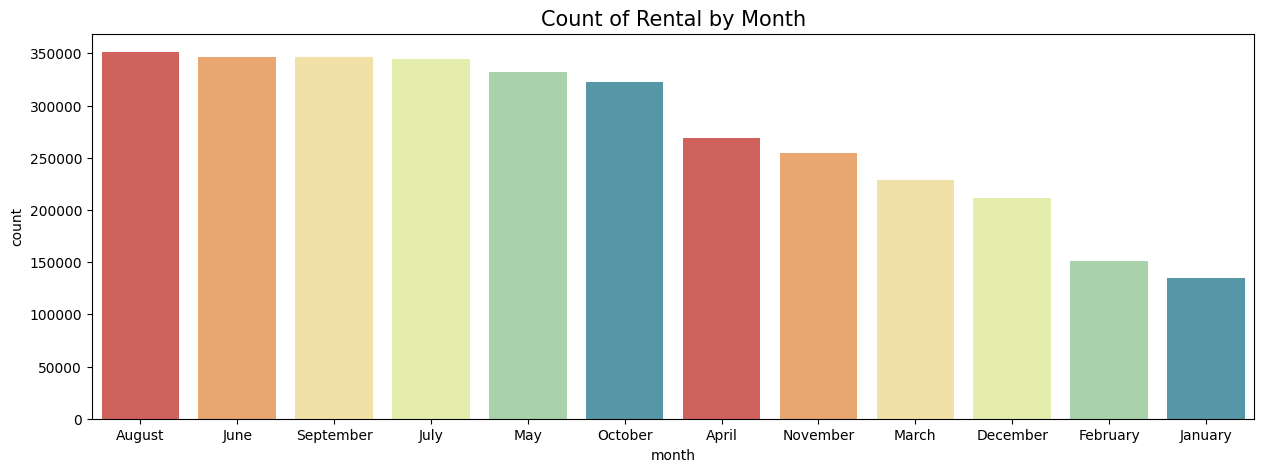

In [30]:
month_stat = hour_df.groupby("month")["count"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15, 5))
sns.barplot(y="count", x="month",data=month_stat, palette=sns.color_palette("Spectral"))
plt.title("Count of Rental by Month", loc="center", fontsize=15)
plt.show()

Dari visualisasi di atas, terlihat bahwa jumlah peminjaman sepeda paling tinggi terjadi pada bulan Agustus, Juni, dan September.

### Pertanyaan 2: Bagaimana kinerja bike sharing berdasarkan hari dan tipe konsumen?

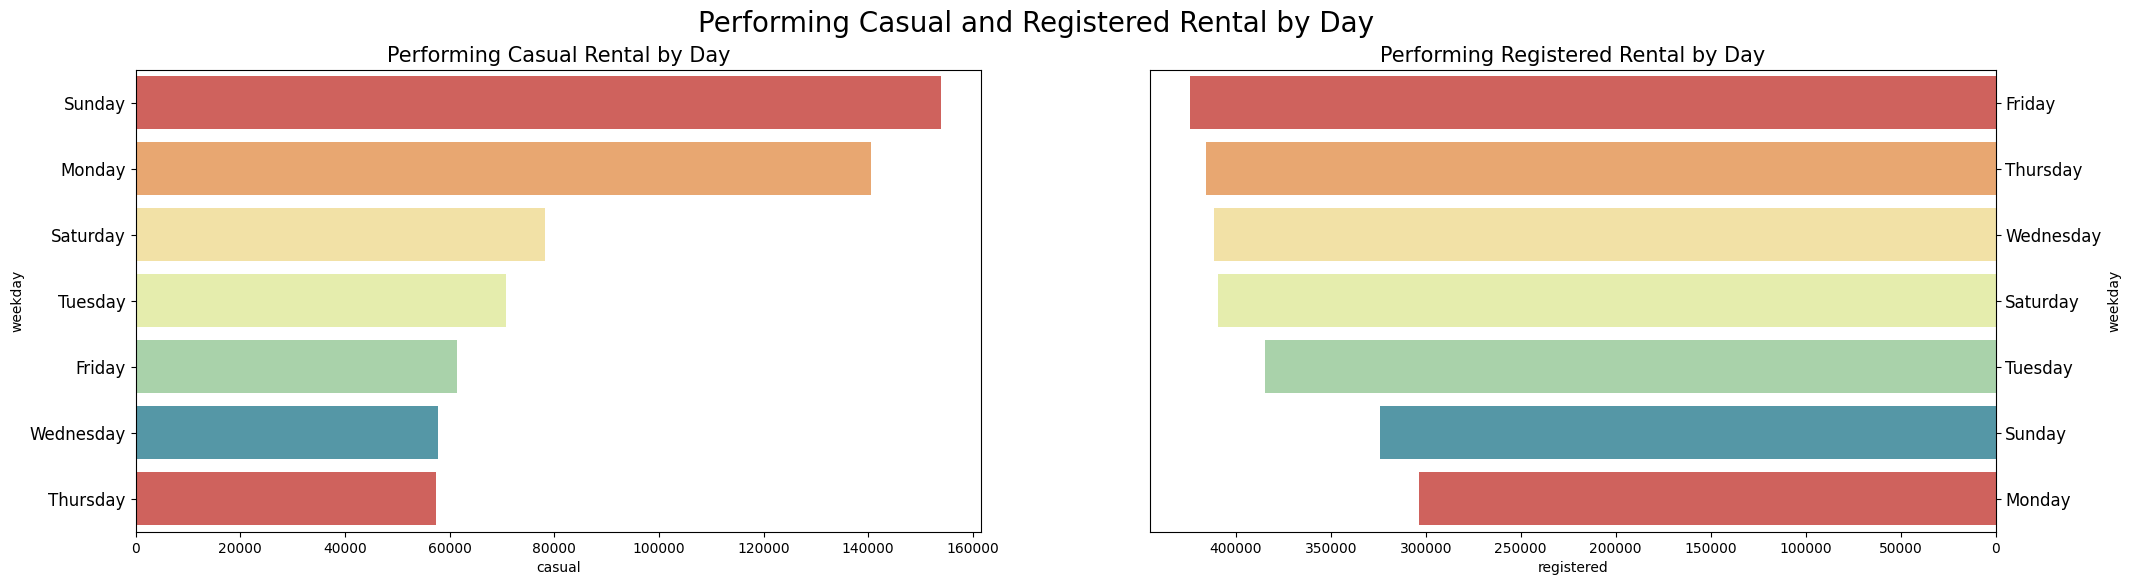

In [31]:
casual_stat = hour_df.groupby("weekday")["casual"].sum().sort_values(ascending=False).reset_index()

registered_stat = hour_df.groupby("weekday")["registered"].sum().sort_values(ascending=False).reset_index()

fig, ax = plt.subplots(1, 2, figsize=(24, 6))

for i, (data, title) in enumerate(zip([casual_stat, registered_stat], ["Performing Casual Rental by Day", "Performing Registered Rental by Day"])):
    ax[i].set_ylabel(None)
    ax[i].set_xlabel(None)
    ax[i].set_title(title, loc="center", fontsize=15)
    ax[i].tick_params(axis='y', labelsize=12)

    if i == 1:
        ax[i].invert_xaxis()
        ax[i].yaxis.set_label_position("right")
        ax[i].yaxis.tick_right()

    sns.barplot(x=data["casual"] if i == 0 else data["registered"], y=data["weekday"], palette=sns.color_palette("Spectral"), ax=ax[i])

plt.suptitle("Performing Casual and Registered Rental by Day", fontsize=20)
plt.show()


Melalui visualisasi di atas, terlihat bahwa peminjaman sepeda oleh pengguna casual mencapai puncaknya pada hari Minggu. Hal ini mungkin disebabkan oleh liburan akhir pekan. Sementara itu, pengguna terdaftar lebih cenderung meminjam sepeda terbanyak pada hari Jumat, yang mungkin terkait dengan perjalanan ke dan dari tempat kerja di hari terakhir kerja / 1 hari menuju weekend.

### Pertanyaan 3: Bagaimana kinerja bike sharing berdasarkan cuaca?

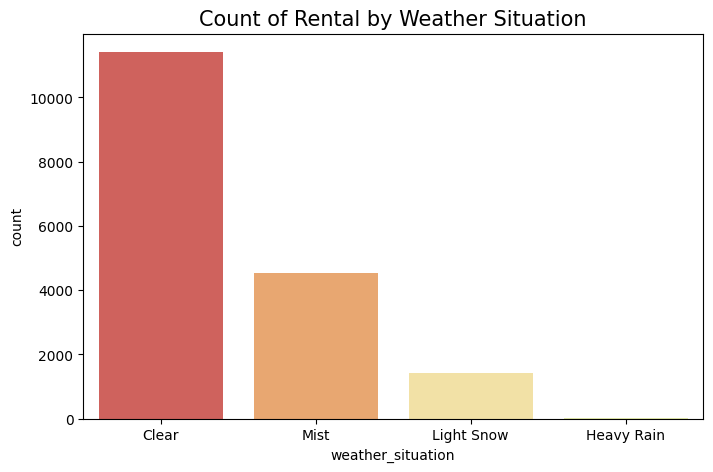

In [32]:
weather_stat = hour_df.groupby("weather_situation")["count"].count().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(y="count", x="weather_situation",data=weather_stat, palette=sns.color_palette("Spectral"))
plt.title("Count of Rental by Weather Situation", loc="center", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Bikes Perfoms by Weather Situation')

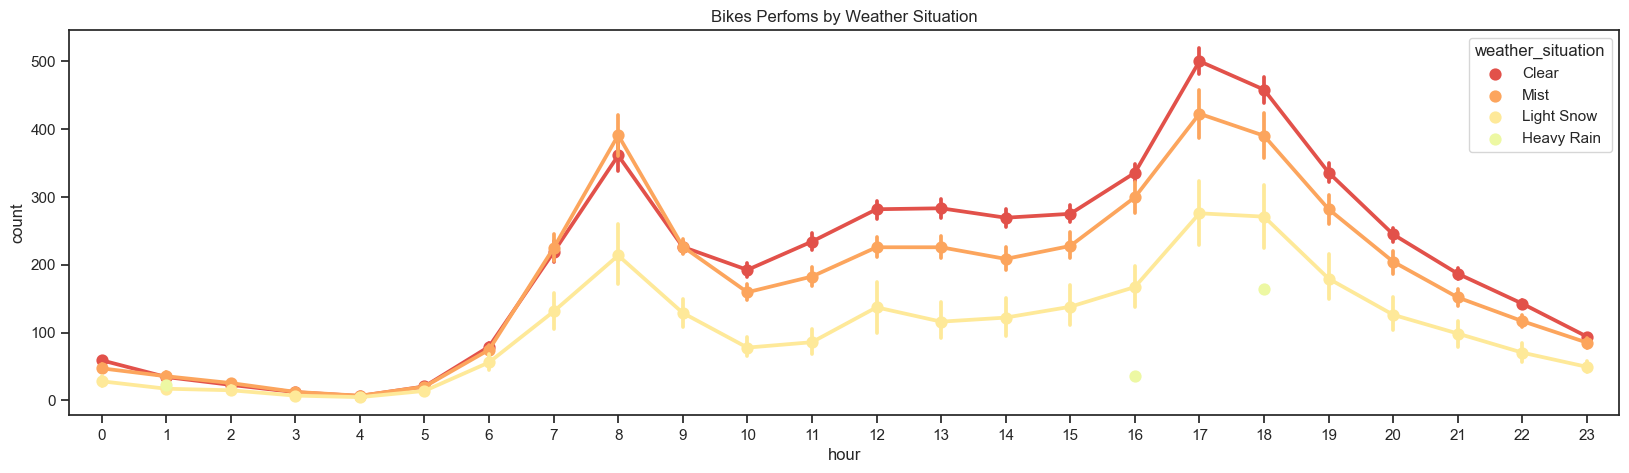

In [33]:
plt.figure(figsize=(20, 5))
sns.set(style="ticks")
sns.pointplot(data=hour_df[['hour', 'count', 'weather_situation',]], x='hour', y='count', hue='weather_situation', palette=sns.color_palette("Spectral"))
plt.title('Bikes Perfoms by Weather Situation')

Melalui visualisasi di atas, terlihat bahwa puncak jumlah peminjaman terjadi selama cuaca cerah, terutama pada pukul 17.00. Hal yang sama berlaku untuk cuaca lainnya, di mana titik tertinggi peminjaman juga terjadi pada pukul 17.00. Penurunan jumlah peminjaman ketika menjelang tengah malam hingga pagi hari kemungkinan karena berkurangnya aktivitas masyarakat selama jam-jam tersebut. Sebaliknya, kenaikan jumlah peminjaman menjelang sore hingga malam hari mungkin disebabkan oleh kegiatan setelah jam kerja atau aktivitas harian.

### Pertanyaan 4: Bagaimana kinerja bike sharing pada tiap musim?

Text(0.5, 1.0, 'Bikes Perfoms by Hour per Seasons')

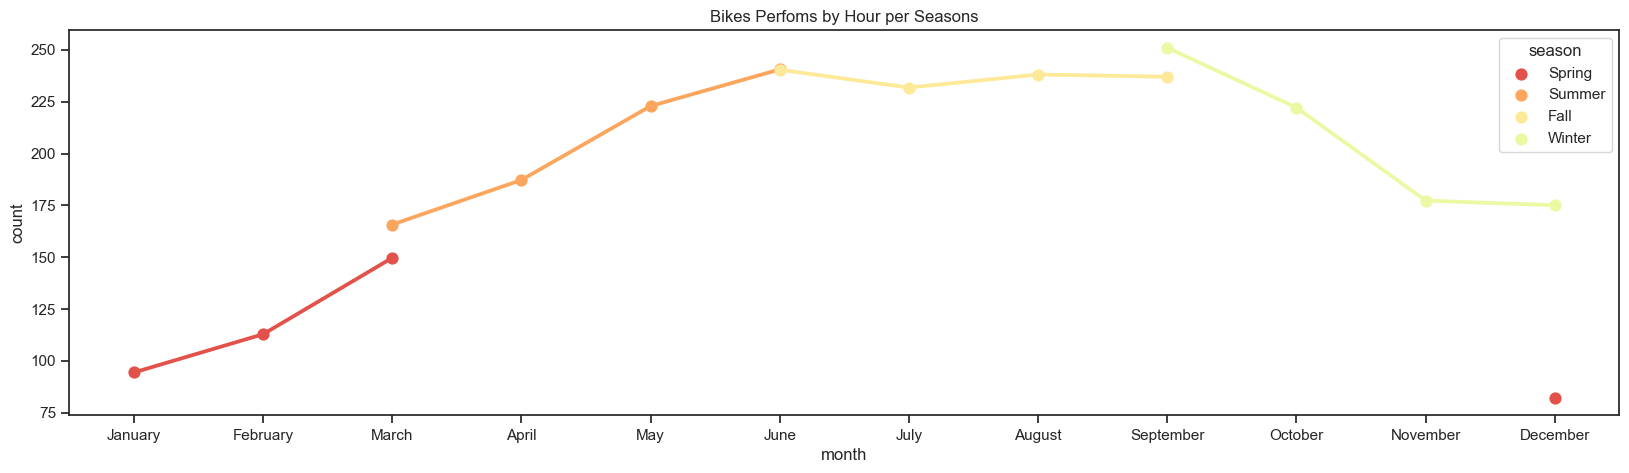

In [34]:
plt.figure(figsize=(20, 5))
sns.set(style="ticks")
sns.pointplot(data=hour_df, x='month', y='count', hue='season', palette=sns.color_palette("Spectral"), ci=None)
plt.title('Bikes Perfoms by Hour per Seasons')

Jumlah pengguna mencapai titik terendah selama musim Semi, dan mengalami peningkatan bertahap seiring berjalannya musim Panas. Selama musim Gugur, jumlah pengguna cenderung stabil. Jumlah ini mencapai puncak pada awal musim Dingin, tetapi kemudian mengalami penurunan.

## RFM Analysis

In [35]:
hour_df.head()

,dteday,season,year,month,hour,weekday,workingday,weather_situation,temp,feeling_temperature,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,January,0,Sunday,Holiday,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,January,1,Sunday,Holiday,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,January,2,Sunday,Holiday,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,January,3,Sunday,Holiday,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,January,4,Sunday,Holiday,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [36]:
# Temukan tanggal terbaru dalam dataset
recent_date = hour_df['dteday'].max()

# Hitung recency
hour_df['recency'] = (recent_date - hour_df['dteday']).dt.days

# Group by 'hour'
rfm_df = hour_df.groupby("hour", as_index=False).agg(
    monetary=("count", "sum"),
    frequency=("count", "count"),
    recency=("recency", "min")
)

rfm_df = rfm_df[["hour", "frequency", "monetary", "recency"]]
rfm_df.head()

,hour,frequency,monetary,recency
0,0,726,39130,0
1,1,724,24164,0
2,2,715,16352,0
3,3,697,8174,0
4,4,697,4428,0


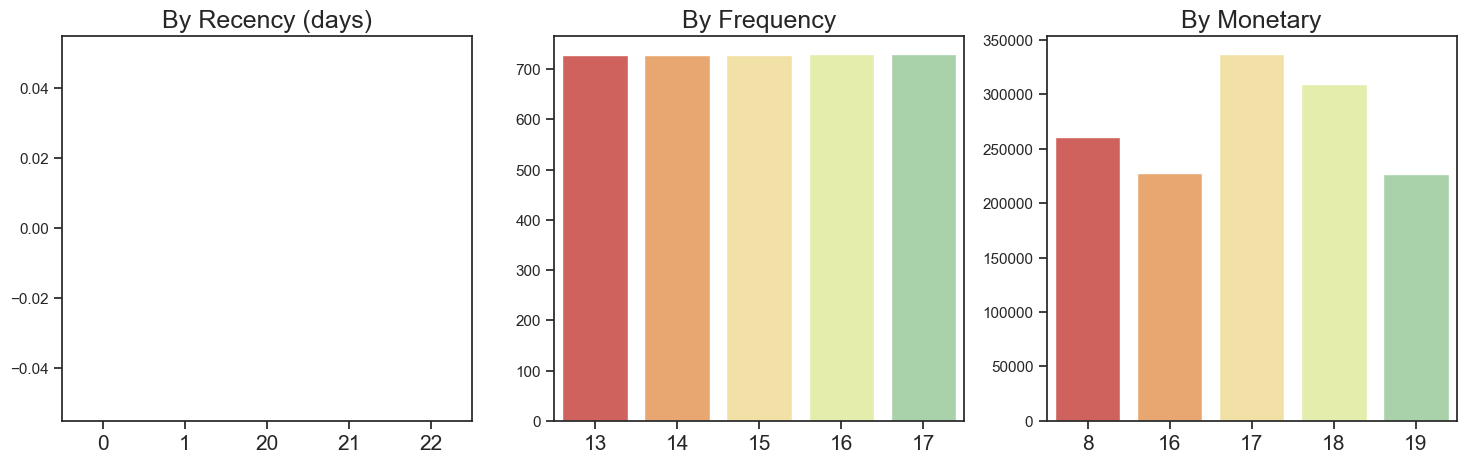

In [37]:
def plot_rfm(df, column, title, ax, n=5):
    sns.barplot(y=column, x="hour", data=df.sort_values(by=column, ascending=False).head(n), palette=sns.color_palette("Spectral"), ax=ax)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_title(title, loc="center", fontsize=18)
    ax.tick_params(axis='x', labelsize=15)

# Membuat subplot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plot Recency
plot_rfm(rfm_df, "recency", "By Recency (days)", ax[0])

# Plot Frequency
plot_rfm(rfm_df, "frequency", "By Frequency", ax[1])

# Plot Monetary
plot_rfm(rfm_df, "monetary", "By Monetary", ax[2])

## Conclusion

1. Bulan Agustus menonjol sebagai bulan dengan tingkat sewa tertinggi, diikuti oleh Juni dan September.
2. Hari Minggu menjadi pilihan utama bagi konsumen casual untuk menyewa sepeda, sementara konsumen registered lebih aktif pada hari Jumat. Kemungkinan pada hari Minggu, banyak orang memiliki waktu luang untuk bersepeda rekreasi, sementara pada hari Jumat atau akhir workday, orang mungkin menggunakan sepeda untuk pergi ke pekerjaan atau kegiatan lainnya.
3. Cuaca cerah menjadi favorit di antara konsumen yang ingin menyewa sepeda, dan puncak permintaan terjadi pada jam 17:00, diikuti oleh jam 08:00, terlepas dari kondisi cuaca apapun. Kemungkinan orang lebih suka bersepeda saat cuaca cerah karena lebih nyaman, dan jam 17:00 mungkin merupakan waktu setelah jam kerja atau sekolah di mana orang memiliki waktu luang.
4. Sewa sepeda mencapai puncaknya dan tetap stabil selama musim gugur, terutama dari bulan Juni hingga September. Kemungkinan musim gugur memiliki kondisi cuaca, suhu yang lebih nyaman untuk digunakan bersepeda.

In [38]:
hour_df.to_csv("hour_data.csv", index=False)